In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, kurtosis, skew
import re
import plotly.express as px
from statsmodels.stats.outliers_influence import variance_inflation_factor 

pre=pd.read_csv('pretourney_clean.csv')
pre.drop(columns='Unnamed: 0', inplace=True, axis=1)
tourney=pd.read_csv('tourney_final.csv')
tourney.drop(columns='Unnamed: 0', inplace=True, axis=1)

In [2]:
pre.head()

,Team/Year,Tempo,RankTempo,AdjTempo,RankAdjTempo,OE,RankOE,AdjOE,RankAdjOE,DE,RankDE,AdjDE,RankAdjDE,AdjEM,RankAdjEM,seed
0,2001 Air Force,57.8957,319,56.5365,320,99.4753,194,103.4550,141,108.4710,286,108.8230,277,-5.36745,208,NaN
1,2001 Akron,66.3672,266,66.0571,241,101.8900,137,104.1070,125,108.9820,296,108.3890,269,-4.28147,198,NaN
2,2001 Alabama,71.5751,100,69.5947,113,106.1500,64,109.1650,50,95.2501,45,94.2399,42,14.92560,39,NaN
3,2001 Alabama A&M,78.0625,5,74.7798,10,92.9641,284,89.9840,310,94.4888,37,101.2420,143,-11.25750,260,NaN
4,2001 Alabama St.,69.1009,185,64.3766,282,99.8084,191,94.6376,266,90.5706,4,99.1054,108,-4.46782,202,16.0


In [3]:
tourney.head()

,Team/Year,Tempo,RankTempo,AdjTempo,RankAdjTempo,OE,RankOE,AdjOE,RankAdjOE,DE,RankDE,AdjDE,RankAdjDE,AdjEM,RankAdjEM,seed
0,2001 Alabama St.,69.1009,185,64.3766,282,99.8084,191,94.6376,266,90.5706,4,99.1054,108,-4.46782,202,16.0
1,2001 Arizona,72.7256,67,71.0643,73,111.0580,15,116.4690,10,90.7581,5,86.5783,3,29.89020,4,2.0
2,2001 Arkansas,74.3192,36,71.3952,62,106.9450,52,109.8390,44,92.9369,23,92.6020,25,17.23740,27,7.0
3,2001 BYU,65.9770,277,66.0401,243,107.6300,39,109.4360,46,94.1607,31,93.9034,38,15.53260,36,12.0
4,2001 Boston College,70.3050,145,68.5354,153,114.0300,5,117.5420,5,94.3622,35,94.1297,41,23.41210,11,3.0


Using Regex to remove rankings from raw dataset

In [4]:
maskall=~pre.columns.str.contains('Rank', regex=True)
masktourney=~tourney.columns.str.contains('Rank',regex=True)

predata=pre.loc[:,maskall]
predata.head()

,Team/Year,Tempo,AdjTempo,OE,AdjOE,DE,AdjDE,AdjEM,seed
0,2001 Air Force,57.8957,56.5365,99.4753,103.4550,108.4710,108.8230,-5.36745,NaN
1,2001 Akron,66.3672,66.0571,101.8900,104.1070,108.9820,108.3890,-4.28147,NaN
2,2001 Alabama,71.5751,69.5947,106.1500,109.1650,95.2501,94.2399,14.92560,NaN
3,2001 Alabama A&M,78.0625,74.7798,92.9641,89.9840,94.4888,101.2420,-11.25750,NaN
4,2001 Alabama St.,69.1009,64.3766,99.8084,94.6376,90.5706,99.1054,-4.46782,16.0


In [5]:
predata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7259 entries, 0 to 7258
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Team/Year  7259 non-null   object 
 1   Tempo      7259 non-null   float64
 2   AdjTempo   7259 non-null   float64
 3   OE         7259 non-null   float64
 4   AdjOE      7259 non-null   float64
 5   DE         7259 non-null   float64
 6   AdjDE      7259 non-null   float64
 7   AdjEM      7259 non-null   float64
 8   seed       1398 non-null   float64
dtypes: float64(8), object(1)
memory usage: 510.5+ KB


In [6]:
tourneydata=tourney.loc[:,masktourney]
tourneydata.head()

,Team/Year,Tempo,AdjTempo,OE,AdjOE,DE,AdjDE,AdjEM,seed
0,2001 Alabama St.,69.1009,64.3766,99.8084,94.6376,90.5706,99.1054,-4.46782,16.0
1,2001 Arizona,72.7256,71.0643,111.0580,116.4690,90.7581,86.5783,29.89020,2.0
2,2001 Arkansas,74.3192,71.3952,106.9450,109.8390,92.9369,92.6020,17.23740,7.0
3,2001 BYU,65.9770,66.0401,107.6300,109.4360,94.1607,93.9034,15.53260,12.0
4,2001 Boston College,70.3050,68.5354,114.0300,117.5420,94.3622,94.1297,23.41210,3.0


Univariate Analysis

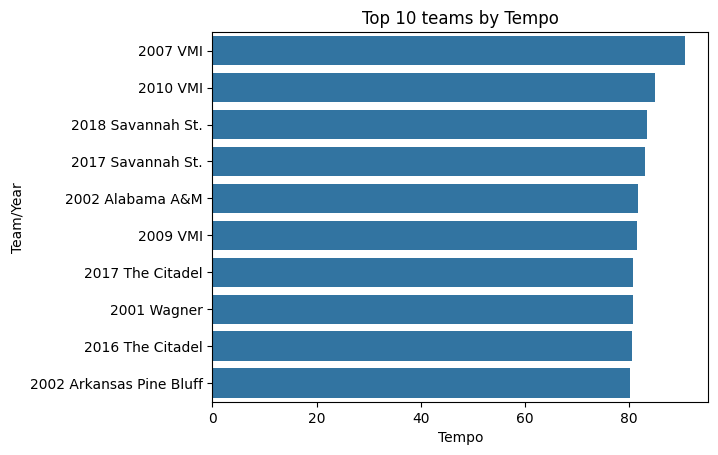

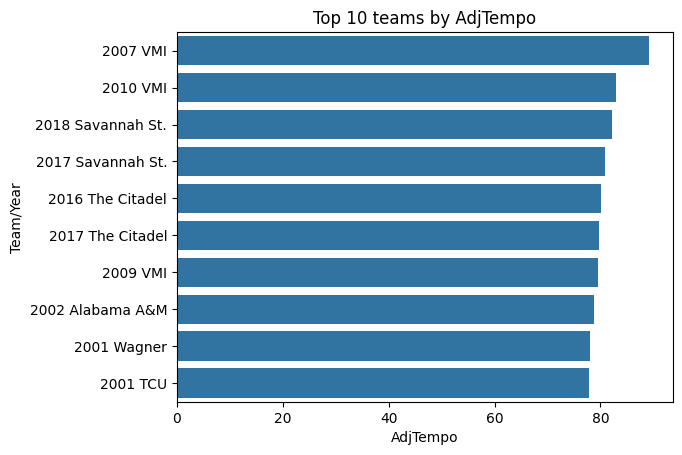

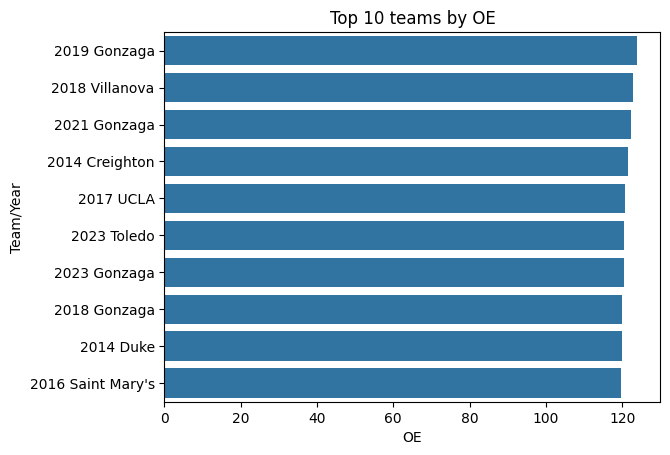

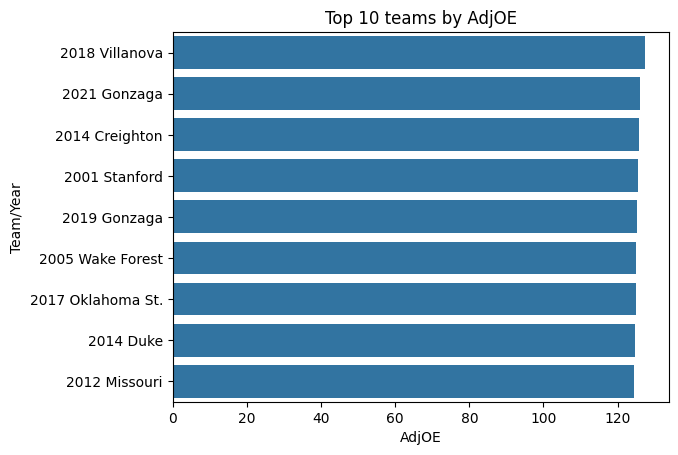

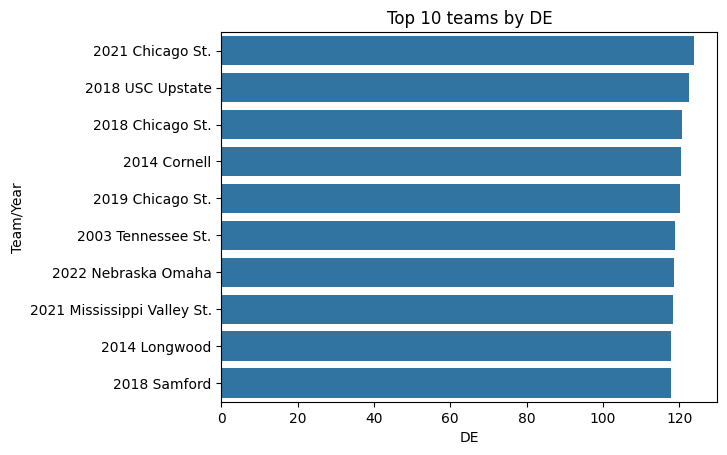

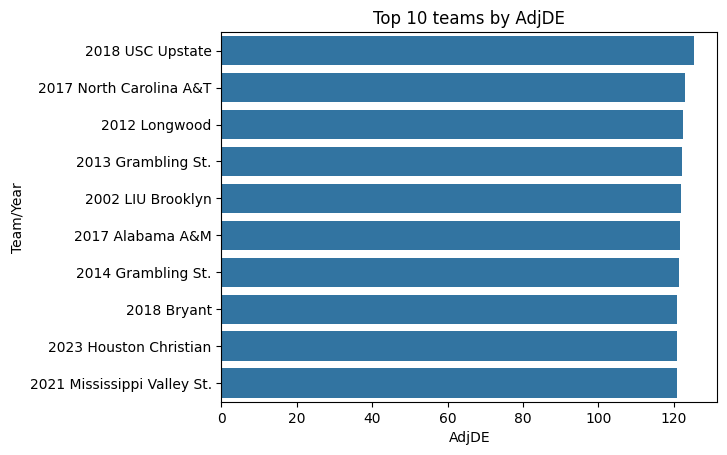

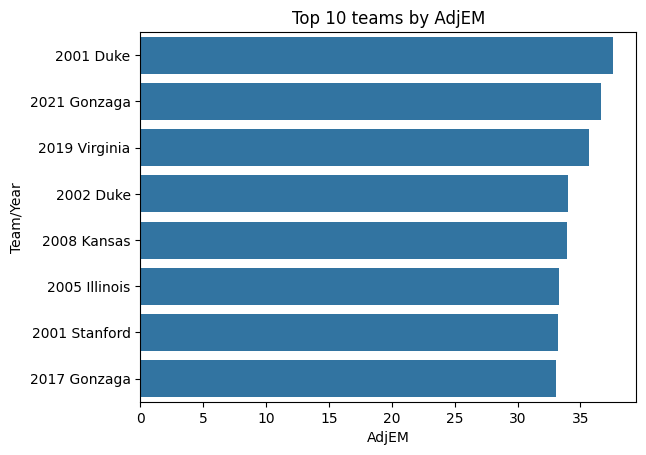

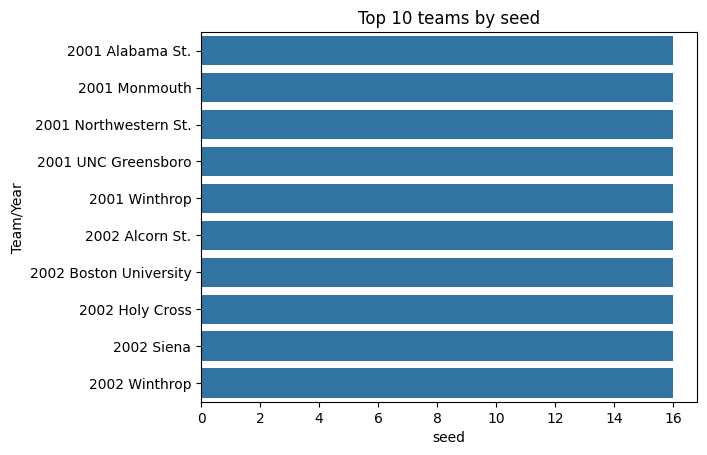

In [11]:
for col in predata.select_dtypes(exclude='object').columns:
    top_10=predata.nlargest(10, col)
    sns.barplot(x=top_10[col],y=top_10['Team/Year'])
    plt.title(f'Top 10 teams by {col}')
    plt.xlabel(f'{col}')
    plt.show()

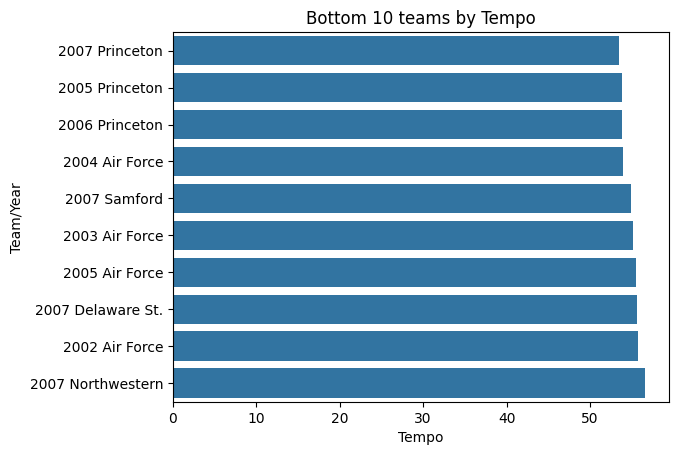

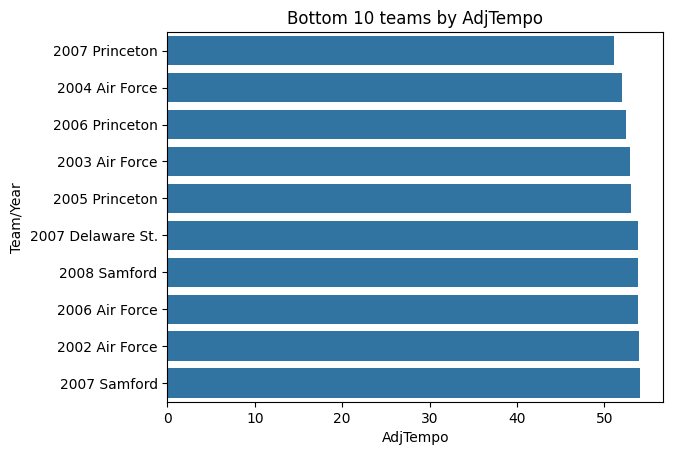

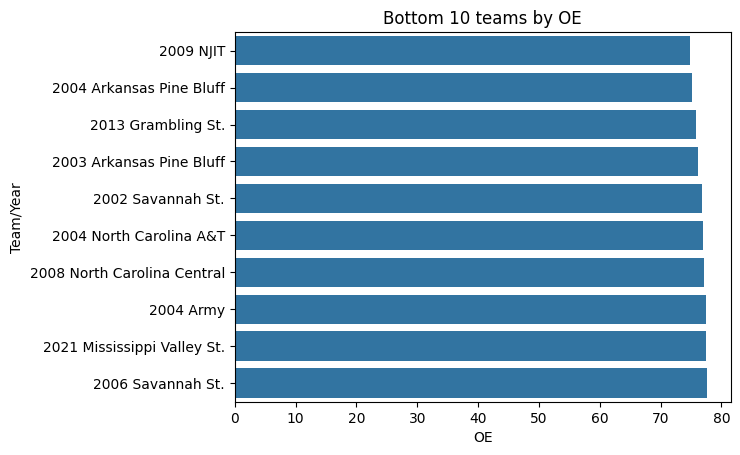

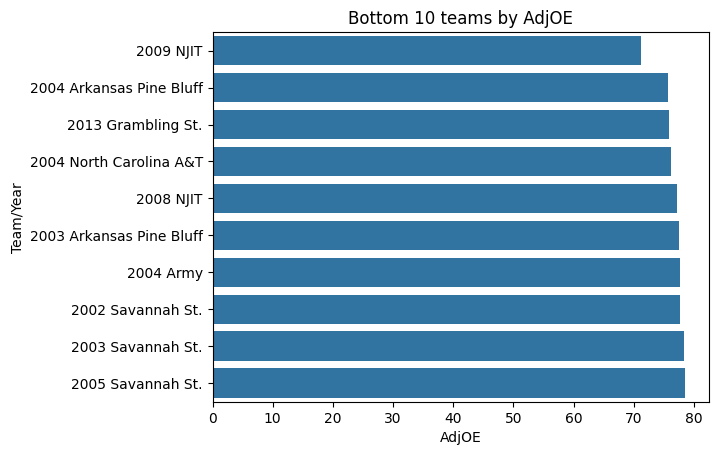

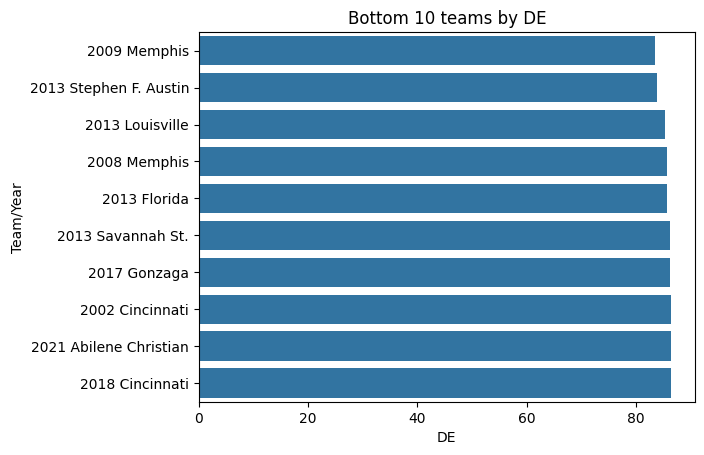

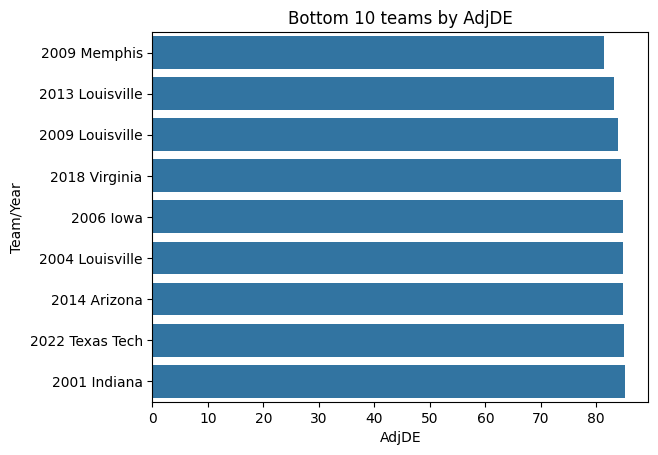

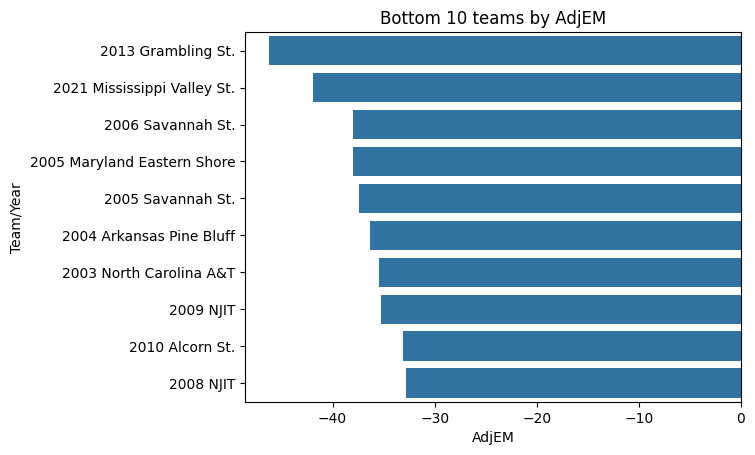

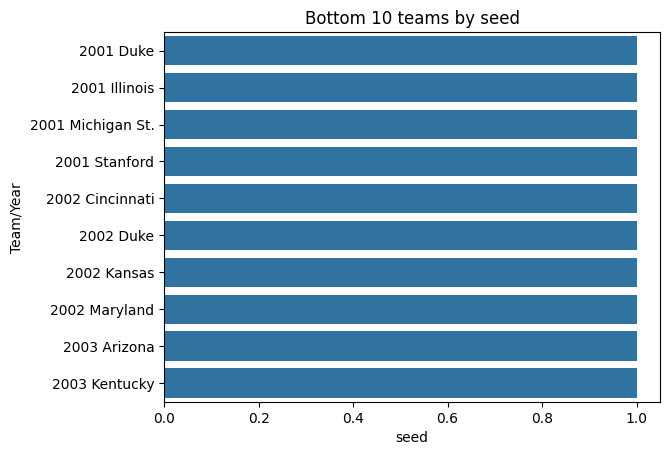

In [12]:
for col in predata.select_dtypes(exclude='object').columns:
    top_10=predata.nsmallest(10, col)
    sns.barplot(x=top_10[col],y=top_10['Team/Year'])
    plt.title(f'Bottom 10 teams by {col}')
    plt.xlabel(f'{col}')
    plt.show()

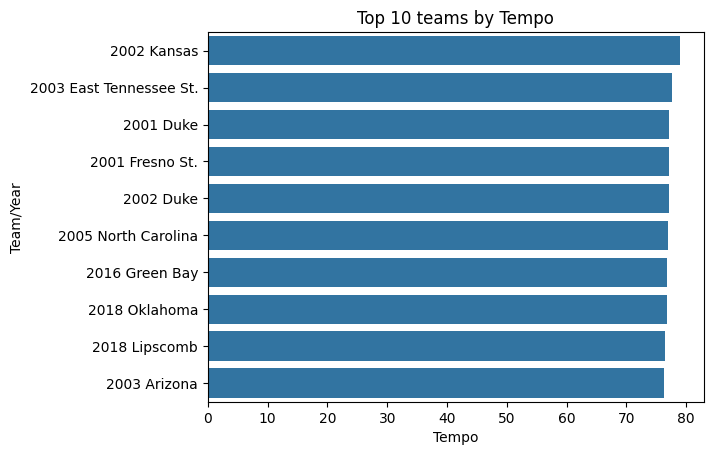

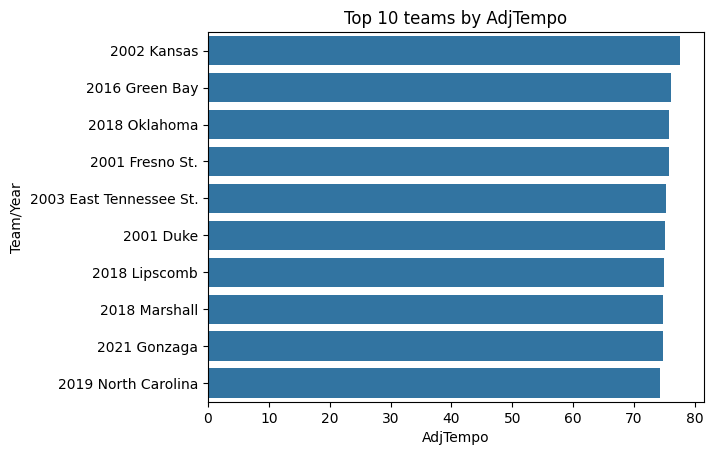

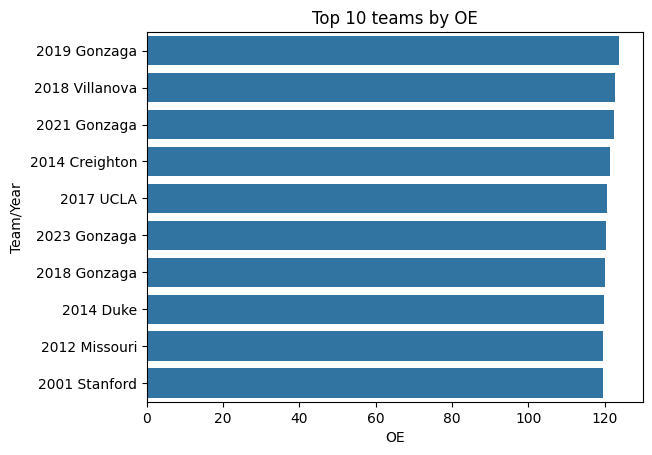

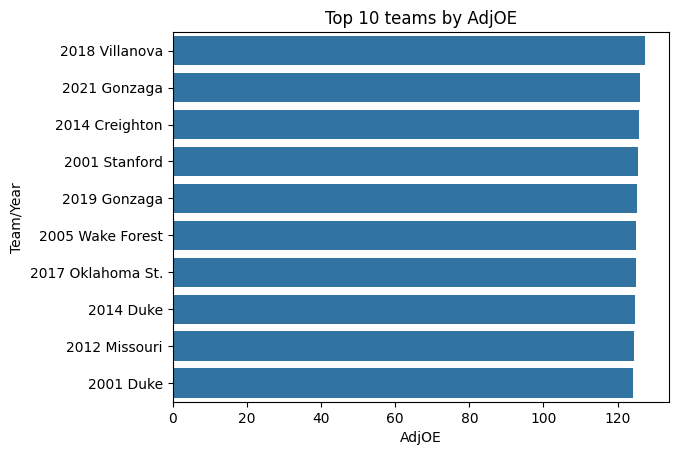

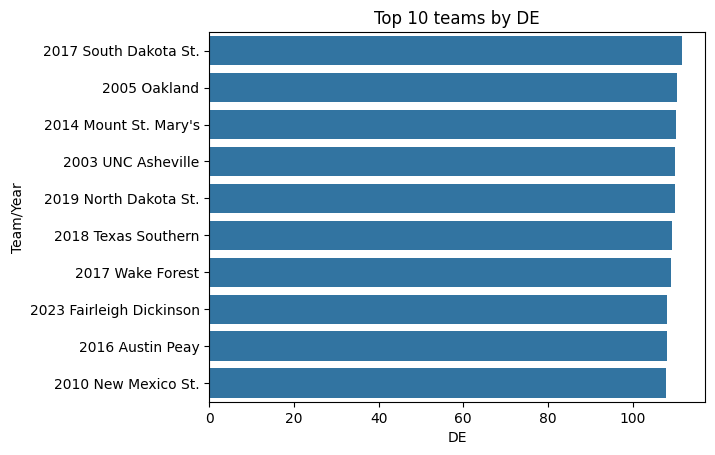

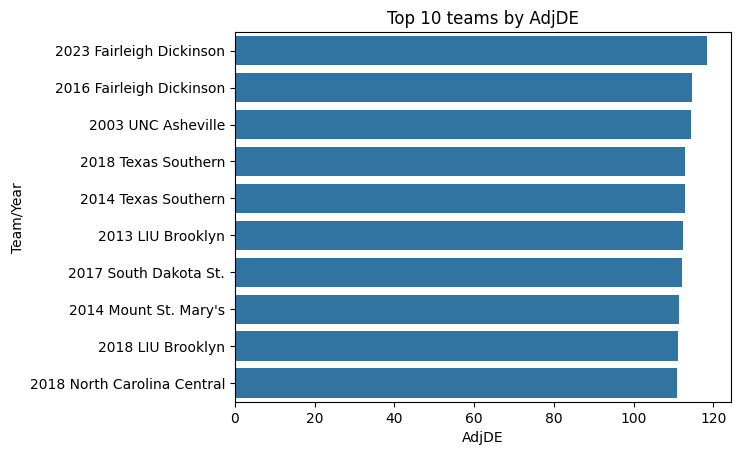

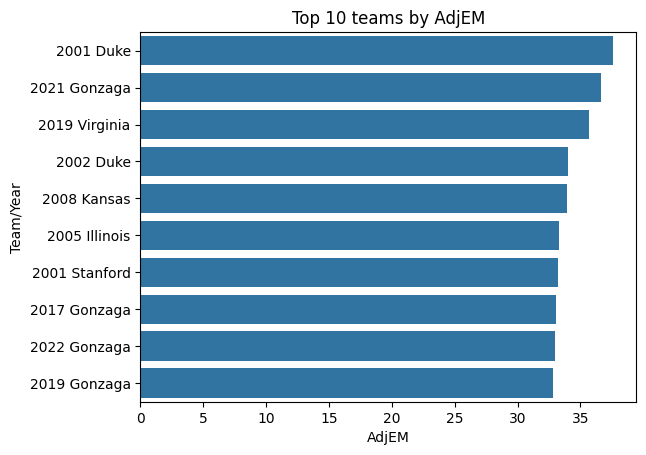

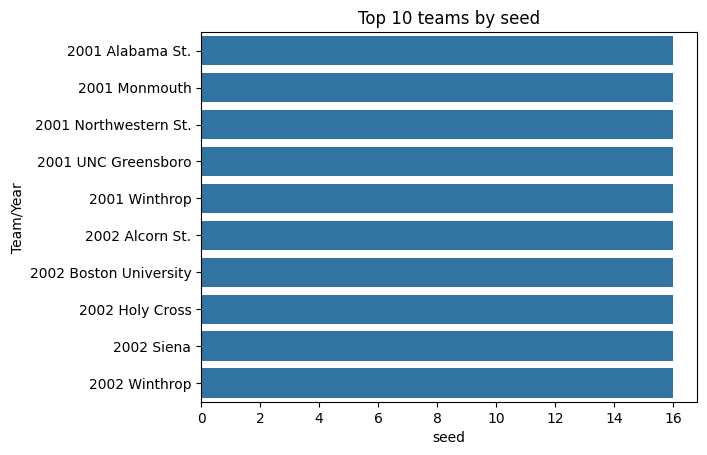

In [13]:
for col in tourneydata.select_dtypes(exclude='object').columns:
    top_10=tourneydata.nlargest(10, col)
    sns.barplot(x=top_10[col],y=top_10['Team/Year'])
    plt.title(f'Top 10 teams by {col}')
    plt.xlabel(f'{col}')
    plt.show()

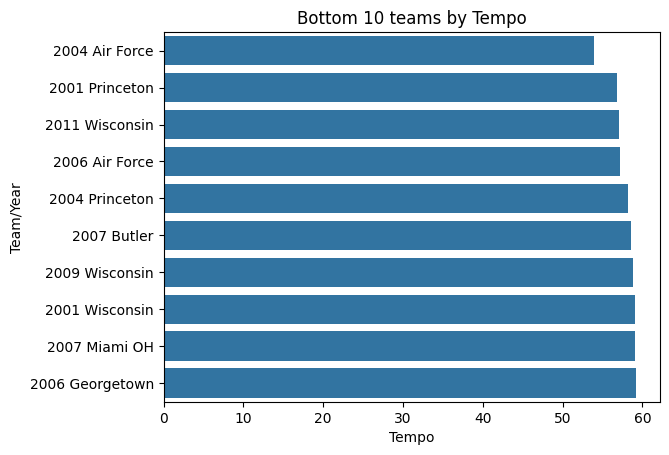

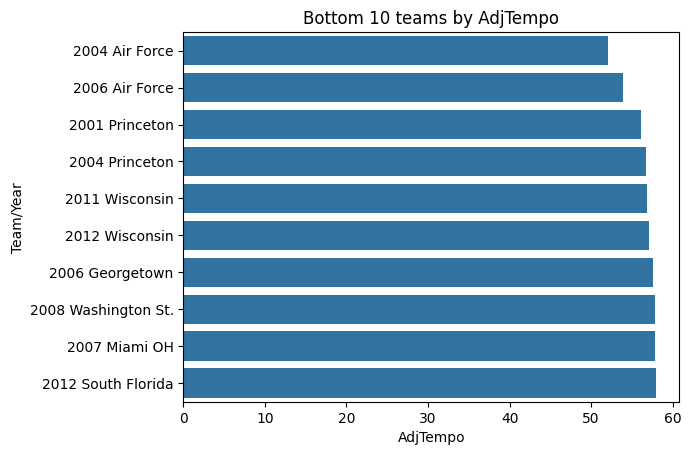

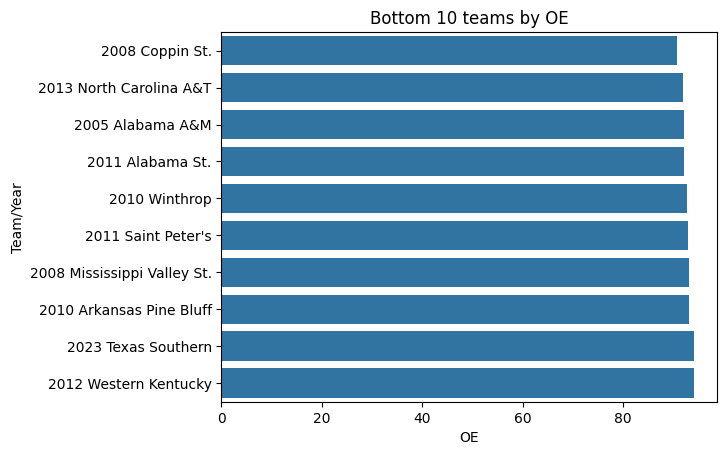

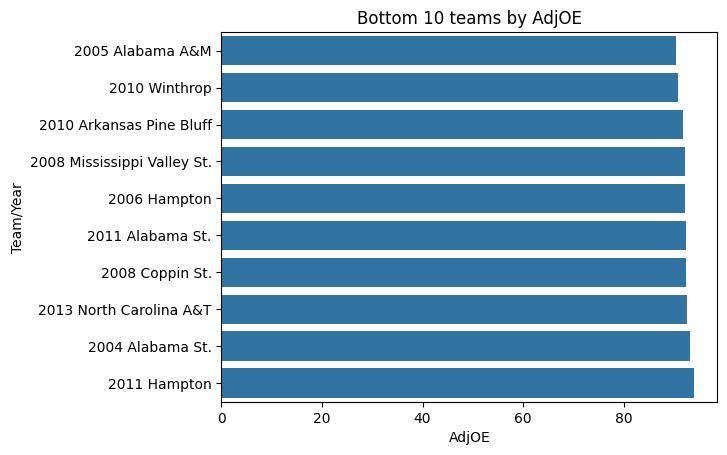

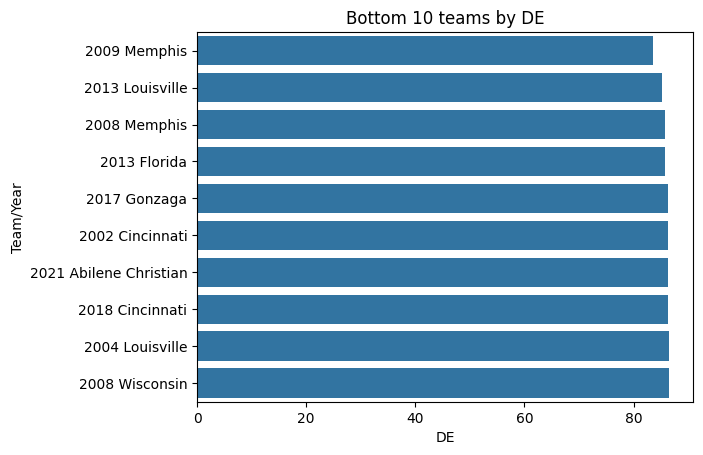

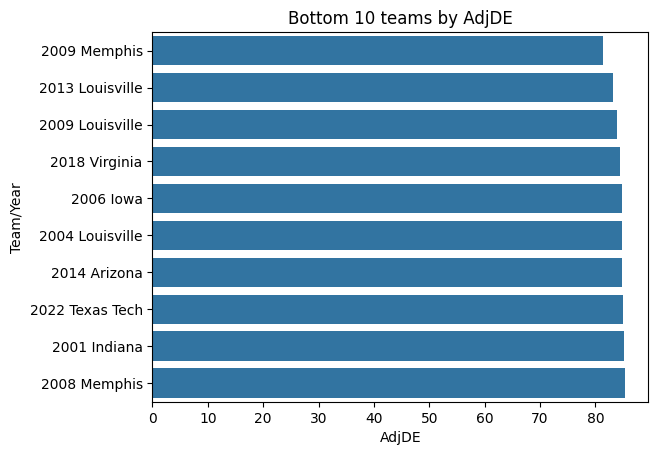

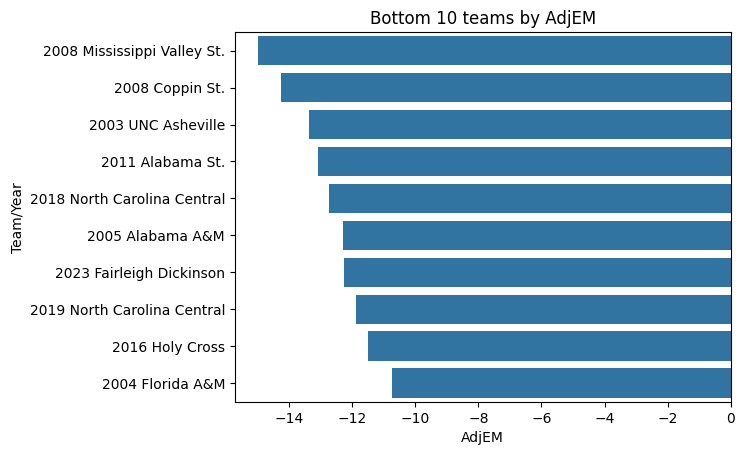

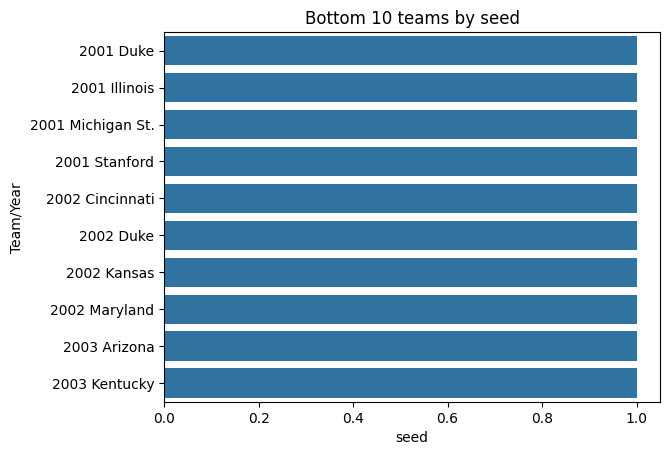

In [14]:
for col in tourneydata.select_dtypes(exclude='object').columns:
    top_10=tourneydata.nsmallest(10, col)
    sns.barplot(x=top_10[col],y=top_10['Team/Year'])
    plt.title(f'Bottom 10 teams by {col}')
    plt.xlabel(f'{col}')
    plt.show()